# The London Railway Network

The cell below defines the abstract class whose API you will need to impement. Do NOT modify it.

In [1]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

class AbstractLondonRailwayMapper(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # data initialisation
    @abstractmethod
    def loadStationsAndLines(self):
        pass

    # returns the minimum number of stops to connect station "fromS" to station  "toS"
    # fromS : str
    # toS : str
    # numStops : int
    @abstractmethod
    def minStops(self, fromS, toS):     
        numStops = -1
        return numStops    
    
    # returns the minimum distance in miles to connect station "fromS" to station  "toS"
    # fromS : str
    # toS : str
    # minDistance : float
    @abstractmethod
    def minDistance(self, fromS, toS):
        minDistance = -1.0
        return minDistance
    
    # given an unordered list of station names, returns a new railway line 
    # (represented as a list of adjacent station names), connecting all such stations 
    # and such that the sum of the distances (in miles) between adjacent stations is minimised
    # inputList : set<str>
    # outputList : list<str>
    @abstractmethod
    def newRailwayLine(self, inputList):
        outputList = []
        return outputList

Use the cell below to define any data structure and auxiliary python function you may need. Leave the implementation of the main API to the next code cell instead.

In [2]:
class Node:
    def __init__(self, item = None):
        self.item = item
        self.next = None
        self.previous = None

class Queue: 
    # Use linked list to implepent instead of list, making it O(1) to dequeue
    def __init__(self):
        self.length = 0
        self.head = None
        self.tail = None

    def enqueue(self, x):
        newNode = Node(x)
        if self.head == None:
            self.head = self.tail = newNode
        else:
            self.tail.next = newNode
            newNode.previous = self.tail
            self.tail = newNode
        self.length += 1

    def dequeue (self):
        item = self.head.item
        self.head = self.head.next 
        self.length -= 1
        if self.length == 0:
            self.last = None
        return item

    def isEmpty(self):
        return self.length == 0

class Heap:
    def __init__(self):
        self.heapList = [0] # Root start from index 1
        self.currentSize = 0

    def minChild(self,i):
        if i*2+1 > self.currentSize:
            return i*2
        else:
            if self.heapList[i*2] < self.heapList[i*2+1]:
                return i*2
            else:
                return i*2+1

    def percDown(self,i):
        while i*2 <= self.currentSize:
            minChildIndex = self.minChild(i)
            if self.heapList[i] > self.heapList[minChildIndex]:
                tmp = self.heapList[i]
                self.heapList[i] = self.heapList[minChildIndex]
                self.heapList[minChildIndex] = tmp
            i = minChildIndex

    def pop(self):
        returnValue = self.heapList[1]
        self.heapList[1] = self.heapList[self.currentSize]
        self.currentSize = self.currentSize - 1
        self.heapList.pop()
        self.percDown(1)
        return returnValue

    def percUp(self,i):
        while i//2 >0:
            if self.heapList[i] < self.heapList[i//2]:
                tmp = self.heapList[i//2] 
                self.heapList[i//2]=self.heapList[i]
                self.heapList[i]=tmp
            i=i//2 

    def insert(self,k):
        self.heapList.append(k)
        self.currentSize = self.currentSize + 1
        self.percUp(self.currentSize) 

class Vertex:
    def __init__(self, key):
        self.id = key
        self.connectedTo = {}

    def addNeighbor(self, neighbor, weight = 0):
        self.connectedTo[neighbor] = weight

    def __repr__(self):
        return str(self.id) + " connectedTo: "\
            + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()
    
    def getId(self):
        return self.id

    def getWeight(self, neighbor):
        return self.connectedTo[neighbor]

class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0

    def addVertex(self, key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self, n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None
    
    def __contains__(self, n):
        return n in self.vertList

    def addEdge(self, f, t, cost=0):
        if f not in self.vertList:
            self.addVertex(f)
        if t not in self.vertList:
            self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], cost)
        # Comment te next line out to test graph methods
        self.vertList[t].addNeighbor(self.vertList[f], cost) # For Undirected Graph
    
    def getVertices(self):
        return self.vertList.keys()

    def  __iter__(self):
        return iter(self.getVertices)

    def printEdges(self):
        for v in self.vertList.values():
            for w in v.getConnections():
                print("(%s, %s, %s)"%(v.getId(), w.getId(), v.connectedTo[w]))

    def bfs(self, f, t):
        q = Queue()
        q.enqueue(f)
        searched = { f:0 }
        while not q.isEmpty():
            v = q.dequeue()
            for neighbor in self.vertList[v].getConnections():
                vertName = neighbor.getId()
                if vertName not in searched:
                    searched[vertName] = searched[v] + 1
                    q.enqueue(vertName)
                    if vertName == t:
                        return searched[vertName]

    # Dijkistra but with trick
    def dijkstra(self, f, t):
        searched = { f:0 }
        pq = Heap()
        pq.insert(0)
        while t not in searched:  # Stop finding once reach target, to improve efficiency 
            value = pq.pop()
            searchedKeys = [k for k, v in searched.items() if v == value]
            v = searchedKeys.pop()
            for neighbor in self.vertList[v].getConnections():
                vertName = neighbor.getId()
                newDistance = searched[v] + self.getVertex(v).getWeight(neighbor)
                if vertName not in searched:
                    searched[vertName] = newDistance
                    pq.insert(newDistance) 
                    if vertName == t:
                        return searched[vertName]     
                else:
                    if searched[vertName] > newDistance:
                        searched[vertName] = newDistance
                        pq = Heap()
                        for value in searched.values():
                            pq.insert(value)
        



Use the cell below to implement the requested API.

In [3]:
'''
Note: 
Assume station names will always be from the londonstations.csv file
'''

import csv, random
from math import radians, cos, sin, asin, sqrt, exp

class LondonRailwayMapper(AbstractLondonRailwayMapper):
    
    def __init__(self):
        self.graph = Graph()
        self.distance = [] # table of distance between any 2 stations, better to be stored in a file for further use, only needed in second method
        self.stationNum = {} # number each station, only needed in second method
        self.stationLine = {}
        self.stationCoordinateDict = {}

    # Calculate the great circle distance between two points on the earth 
    def haversine(self, lon1, lat1, lon2, lat2):
        lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
        dlon = lon2 - lon1 
        dlat = lat2 - lat1
        a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
        c = 2 * asin(sqrt(a)) 
        r = 3958.8 # Radius of earth in miles
        return c * r

    # Only need to be called once, O(V^3)
    def getDistanceTable(self): 
        V = len(self.stationNum)
        for k in range(V):
            for i in range(V):
                for j in range(V):
                    self.distance[i][j] = min(self.distance[i][j],self.distance[i][k] + \
                            self.distance[k][j])
        

    def loadStationsAndLines(self):
        with open('londonstations.csv', newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                s = row['Station name']
                self.stationCoordinateDict[s] = (float(row['Latitude']), float(row['Longitude']))
                self.stationLine[s] = []

        with open('londonrailwaylines.csv', newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                f, t, l = row['From Station'], row['To Station'], row['Tube Line']
                if l not in self.stationLine[f]:
                    self.stationLine[f].append(l)  
                if l not in self.stationLine[t]:
                    self.stationLine[t].append(l) 
                weight = self.haversine(self.stationCoordinateDict[f][1], self.stationCoordinateDict[f][0],\
                            self.stationCoordinateDict[t][1],self.stationCoordinateDict[t][0])
                self.graph.addEdge(f, t, weight)

    # Alternative method for loading
    def loadStationsAndLinesToTable(self):
        n = 0
        inf = 999
        with open('londonstations.csv', newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                s = row['Station name']
                self.stationCoordinateDict[s] = (float(row['Latitude']), float(row['Longitude']))
                self.stationNum[s] = n
                n += 1
        self.distance = [[inf for i in range(n)] for j in range(n)]    
        with open('londonrailwaylines.csv', newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                f, t = row['From Station'], row['To Station']
                weight = self.haversine(self.stationCoordinateDict[f][1], self.stationCoordinateDict[f][0],\
                            self.stationCoordinateDict[t][1],self.stationCoordinateDict[t][0])
                self.graph.addEdge(f, t, weight)
                self.distance[self.stationNum[f]][self.stationNum[t]] = weight
                self.distance[self.stationNum[t]][self.stationNum[f]] = weight
        self.getDistanceTable()

    def minStops(self, fromS, toS):     
        numStops = -1
        numStops = self.graph.bfs(fromS, toS)
        return numStops 

    def aStar(self, f, t):
        searchedDistance = { f:0 }
        searched = [f]
        weight = {}
        pq = Heap()
        for neighbor in self.graph.vertList[f].getConnections():
            v = neighbor.getId()
            d = neighbor.getWeight(self.graph.getVertex(f))
            w = d + self.haversine(self.stationCoordinateDict[t][1], self.stationCoordinateDict[t][0],\
                    self.stationCoordinateDict[v][1], self.stationCoordinateDict[v][0])
            weight[v] = w
            pq.insert(w)
            searchedDistance[v] = d
        value = pq.pop()       
        minimumWeightKeys = [k for k, v in weight.items() if v == value]
        vertex = minimumWeightKeys.pop()
        searched.append(vertex)
        
        while t not in searched: 
            weight = {}
            pq = Heap()
            for point in searched:
                for neighbor in self.graph.vertList[point].getConnections():
                    v = neighbor.getId()
                    d = neighbor.getWeight(self.graph.getVertex(point))
                    newDistance = searchedDistance[point] + d
                    if v not in searchedDistance or v in searchedDistance and searchedDistance[v] > newDistance:
                        searchedDistance[v] = newDistance
                    if v not in searched: 
                        w = d + self.haversine(self.stationCoordinateDict[t][1], self.stationCoordinateDict[t][0],\
                                self.stationCoordinateDict[v][1], self.stationCoordinateDict[v][0]) + \
                                    searchedDistance[point]
                        if v not in weight or v in weight and w < weight[v]:
                            weight[v] = w
                            pq.insert(w)           
            value = pq.pop()
            minimumWeightKeys = [k for k, v in weight.items() if v == value]
            vertex = minimumWeightKeys.pop()
            searched.append(vertex)
            
        return searchedDistance[t]

    # First way, A*
    def minDistance(self, fromS, toS):
        minDistance = -1.0
        minDistance = 0 if fromS == toS else self.aStar(fromS, toS)
        return minDistance

    # Second way, use dijkstra with heurustic
    def minDistanceDijkstra(self, fromS, toS):
        minDistance = -1.0
        minDistance = 0 if fromS == toS else self.graph.dijkstra(fromS, toS)
        return minDistance

    # Third way, directly look up in the distance table
    def minDistanceFromTable(self, fromS, toS):
        minDistance = -1.0
        minDistance = 0 if fromS == toS else self.distance[self.stationNum[fromS]][self.stationNum[toS]]
        return minDistance
    
    # codes for newRailwayLine()
    def manhattanDistance(self, sta1, sta2):    # Approximate calculation
        return abs(self.stationCoordinateDict[sta1][0]-self.stationCoordinateDict[sta2][0]) +\
            abs(self.stationCoordinateDict[sta1][1]-self.stationCoordinateDict[sta2][1])

    def pathLength(self, stations):
        totalDistance = 0
        for i in range(len(stations)-1):
            totalDistance += self.manhattanDistance(stations[i], stations[i+1])
        return totalDistance

    # Random swap 2 stations to create a new path
    def createNewPath(self, stations):
        index = range(len(stations))
        i1, i2 = random.sample(index, 2)
        stations[i1], stations[i2] = stations[i2], stations[i1]

    def simulatedAnnealing(self, stations):
        stationList = stations[:]
        T0 = 100 # Initial temperature
        T1 = 1e-8 # Ending temperature
        q = 0.98 # Annealing coefficient
        L = 800 # Number of iterations per T
        T = T0
        while T>T1:
            for i in range(L):
                stationListCopy = stationList[:]
                self.createNewPath(stationList)
                distance1 = self.pathLength(stationListCopy)
                distance2 = self.pathLength(stationList)
                d = distance2 - distance1

                if d>=0: # Metropolis acceptance rule
                    r = random.random()
                    if exp(-d/T)<=r:  # Keep the original solution
                        stationList = stationListCopy[:]
            T *= q # Annealing

        return stationList

    def newRailwayLine(self, inputList):
        outputList = []
        outputList = self.simulatedAnnealing(inputList)
        return outputList

Use the cell below for all python code needed to test the `LondonRailwayMapper` class above.

In [4]:
'''
Note:
For testing loadStationsAndLines() method, we modify different csv files, since there is no parameter representing input file, we can only change the name of file from code "with open('xxxx.csv', newline='') as csvfile:" above .
But we are not allowed to upload test files, so I have to delete the test code of first API.  
I am sorry some test results could not be demonstrated here. 
Same problem with the other methods: only with different graphs, the number of vertices and edges can vary the tests on algorihms can actually be meaningful. 
We can not simply generate random graphs either, the structure would not be same as a "Railway Network Graph", hence tests are still meaningless. As a result, I can only demonstrtate tests on the actual API - showing actual cost on the given graph, comparing between different algorithms I implemented by fixing the graph and varying the input to the API.
'''

import timeit, random
testMapper = LondonRailwayMapper()

# loadStationsAndLines()
t1 = timeit.timeit("testMapper.loadStationsAndLines()", "from __main__ import testMapper", number = 100) # Run 100 times to reduce errors
print(t1/100)

# Alternative method
# t2 = timeit.timeit("testMapper.loadStationsAndLinesToTable()", "from __main__ import testMapper", number = 100)
# print(t2/100)

testMapper.loadStationsAndLines()

# minStops()
stationList = list(testMapper.stationCoordinateDict)
fromS = random.choice(stationList) # Random choose a station
toS = random.choice(stationList) 
stops = testMapper.minStops(fromS, toS)
print("Random Case Test: From", fromS, "to", toS, "takes", stops, "stops.")
t3 = 0
timeListMinStops = []
for i in range(100):
    fromS = random.choice(stationList) # Random choose a station
    toS = random.choice(stationList) 
    t = timeit.timeit("testMapper.minStops(fromS, toS)", "from __main__ import testMapper, fromS, toS", number = 1) 
    timeListMinStops.append(t)
    t3 += t
print(t3/100)

# minDistance()

fromS = random.choice(stationList) # Random choose a station
toS = random.choice(stationList) 
distance = testMapper.minDistance(fromS, toS)
print("Random Case Test: From", fromS, "to", toS, "takes", distance, "miles.")

# A* implementation
t4 = 0
timeListMinDistance = []

# dijkstra implementation
t5 = 0
timeListMinDistanceDij = []

for i in range(100):
    fromS = random.choice(stationList) # Random choose a station
    toS = random.choice(stationList) 

    t = timeit.timeit("testMapper.minDistance(fromS, toS)", "from __main__ import testMapper, fromS, toS", number = 1) 
    timeListMinDistance.append(t)
    t4 += t

    t = timeit.timeit("testMapper.minDistanceDijkstra(fromS, toS)", "from __main__ import testMapper, fromS, toS", number = 1) 
    timeListMinDistanceDij.append(t)
    t5 += t
print("A*: ", t4/100)
print("Dijkstra :", t5/100)

# look up in table
# testMapper.loadStationsAndLinesToTable()
# t6 = 0
# for i in range(100):
#     fromS = random.choice(stationList) # Random choose a station
#     toS = random.choice(stationList) 
#     t6 += timeit.timeit("testMapper.minDistanceFromTable(fromS, toS)", "from __main__ import testMapper, fromS, toS", number = 1) 
# print("Look up in table :", t6/100)


# newRaiwalWayLine()
timeListNewRaiwalWayLine = []
for i in [3,5,10,15,20,50,100]:
    random.shuffle(stationList) # Shuffle the station list and slicing to choose n elements
    stations = stationList[:i]
    t = timeit.timeit("testMapper.newRailwayLine(stations)", "from __main__ import testMapper, stations", number = 1) 
    timeListNewRaiwalWayLine.append(t)
print(timeListNewRaiwalWayLine)

0.004645368999999988
Random Case Test: From Bush Hill Park to Wimbledon takes 11 stops.
0.0003370110000003024
Random Case Test: From Hainault to Pinner takes 25.441445176068815 miles.
A*:  0.008292565999999653
Dijkstra : 0.03321132300000073
[3.2562063999999964, 4.150580899999994, 6.72751550000001, 8.697102700000002, 11.184402500000004, 25.48449819999999, 49.52347520000001]


The cell below exemplifies the test code I will invoke on your submission. Do NOT modify it. 

In [5]:
# DO NOT MODIFY THIS CELL

import timeit

testMapper = LondonRailwayMapper()

#
# testing the loadStationsAndLines() API 
#
starttime = timeit.default_timer()
testMapper.loadStationsAndLines()
endtime = timeit.default_timer()
print("\nExecution time to load:", round(endtime-starttime,3))

#
# testing the minStops() and minStops() API on a sample of from/to station pairs  
#
fromList = ["Baker Street", "Epping", "Canonbury", "Vauxhall"]
toList = ["North Wembley", "Belsize Park", "Balham", "Leytonstone"]

for i in range(len(fromList)):
    starttime = timeit.default_timer()
    stops = testMapper.minStops(fromList[i], toList[i])
    endtime = timeit.default_timer()
    print("\nExecution time minStops:", round(endtime-starttime,3))

    starttime = timeit.default_timer()
    dist = testMapper.minDistance(fromList[i], toList[i])
    endtime = timeit.default_timer()
    print("Execution time minDistance:", round(endtime-starttime,3))

    print("From", fromList[i], "to", toList[i], "in", stops, "stops and", dist, "miles")  
    
#
# testing the newRailwayLine() API on a small list of stations  
#
stationsList = ["Queens Park", "Chigwell", "Moorgate", "Swiss Cottage", "Liverpool Street", "Highgate"]

starttime = timeit.default_timer()
newLine = testMapper.newRailwayLine(stationsList)
endtime = timeit.default_timer()

print("\n\nStation list", stationsList)
print("New station line", newLine)
print("Total track length from", newLine[0], "to", newLine[len(newLine)-1], ":", testMapper.minDistance(newLine[0], newLine[len(newLine)-1]), "miles")
print("Execution time newLine:", round(endtime-starttime,3))

#
# testing the newRailwayLine() API on a big list of stations  
#
stationsList = ["Abbey Road", "Barbican", "Bethnal Green", "Cambridge Heath", "Covent Garden", "Dollis Hill", "East Finchley", "Finchley Road and Frognal", "Great Portland Street", "Hackney Wick", "Isleworth", "Kentish Town West", "Leyton", "Marble Arch", "North Wembley", "Old Street", "Pimlico", "Queens Park", "Richmond", "Shepherds Bush", "Tottenham Hale", "Uxbridge", "Vauxhall", "Wapping"]

starttime = timeit.default_timer()
newLine = testMapper.newRailwayLine(stationsList)
endtime = timeit.default_timer()

print("\n\nStation list", stationsList)
print("New station line", newLine)
print("Total track length from", newLine[0], "to", newLine[len(newLine)-1], ":", testMapper.minDistance(newLine[0], newLine[len(newLine)-1]), "miles")
print("Execution time newLine:", round(endtime-starttime,3))


Execution time to load: 0.006

Execution time minStops: 0.0
Execution time minDistance: 0.003
From Baker Street to North Wembley in 6 stops and 8.227742606564556 miles

Execution time minStops: 0.0
Execution time minDistance: 0.004
From Epping to Belsize Park in 17 stops and 20.649815404486514 miles

Execution time minStops: 0.0
Execution time minDistance: 0.006
From Canonbury to Balham in 10 stops and 8.84027072903102 miles

Execution time minStops: 0.0
Execution time minDistance: 0.003
From Vauxhall to Leytonstone in 6 stops and 8.844551259689169 miles


Station list ['Queens Park', 'Chigwell', 'Moorgate', 'Swiss Cottage', 'Liverpool Street', 'Highgate']
New station line ['Queens Park', 'Swiss Cottage', 'Highgate', 'Moorgate', 'Liverpool Street', 'Chigwell']
Total track length from Queens Park to Chigwell : 18.710225615702868 miles
Execution time newLine: 4.837


Station list ['Abbey Road', 'Barbican', 'Bethnal Green', 'Cambridge Heath', 'Covent Garden', 'Dollis Hill', 'East Finchle

In [6]:
# Graph test code
g = Graph()

g.addEdge(0,1,5)
g.addEdge(0,5,2)
g.addEdge(1,2,4)
g.addEdge(2,3,9)
g.addEdge(3,4,7)
g.addEdge(3,5,3)
g.addEdge(4,0,1)
g.addEdge(5,4,8)
g.addEdge(5,2,1)
print(g.vertList)
print(g.vertList[3].getConnections())
print(g.vertList[0].getConnections())
g.printEdges()
print(g.getVertex(2).getWeight(g.getVertex(3)))
print(g.getVertex(5).getWeight(g.getVertex(4)))
print("---Dijkstra Test----")
print(g.dijkstra(3,4))
print(g.dijkstra(3,2))
print("-Dijkstra Test end.-")
print("------BFS Test------")
print(g.bfs(0,1))
print(g.bfs(0,4))
print(g.bfs(3,5))
print(g.bfs(3,0))
g.addEdge(2,5,1)
g.addEdge(5,0,1)
print(g.bfs(2,1))
print("----BFS Test end.---")
d = Graph()
d.addEdge('v', 'q', 2)
d.addEdge('q', 'w', 1)
d.addEdge('w', 'z')
d.addEdge('v', 'r')
d.printEdges()
print(d.vertList)


{0: 0 connectedTo: [1, 5, 4], 1: 1 connectedTo: [0, 2], 5: 5 connectedTo: [0, 3, 4, 2], 2: 2 connectedTo: [1, 3, 5], 3: 3 connectedTo: [2, 4, 5], 4: 4 connectedTo: [3, 0, 5]}
dict_keys([2 connectedTo: [1, 3, 5], 4 connectedTo: [3, 0, 5], 5 connectedTo: [0, 3, 4, 2]])
dict_keys([1 connectedTo: [0, 2], 5 connectedTo: [0, 3, 4, 2], 4 connectedTo: [3, 0, 5]])
(0, 1, 5)
(0, 5, 2)
(0, 4, 1)
(1, 0, 5)
(1, 2, 4)
(5, 0, 2)
(5, 3, 3)
(5, 4, 8)
(5, 2, 1)
(2, 1, 4)
(2, 3, 9)
(2, 5, 1)
(3, 2, 9)
(3, 4, 7)
(3, 5, 3)
(4, 3, 7)
(4, 0, 1)
(4, 5, 8)
9
8
---Dijkstra Test----
7
9
-Dijkstra Test end.-
------BFS Test------
1
1
1
2
1
----BFS Test end.---
(v, q, 2)
(v, r, 0)
(q, v, 2)
(q, w, 1)
(w, q, 1)
(w, z, 0)
(z, w, 0)
(r, v, 0)
{'v': v connectedTo: ['q', 'r'], 'q': q connectedTo: ['v', 'w'], 'w': w connectedTo: ['q', 'z'], 'z': z connectedTo: ['w'], 'r': r connectedTo: ['v']}


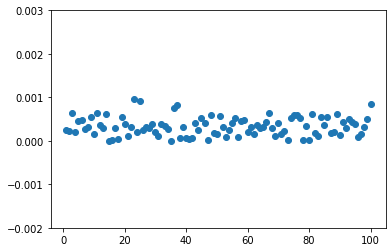

In [7]:
# Genearate plots for report
import matplotlib.pyplot as plt
x = range(1,101)
plt.figure()
plt.ylim(-0.002,0.003)
plt.scatter(x,timeListMinStops)
plt.show()

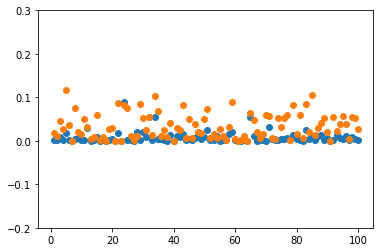

In [8]:
import matplotlib.pyplot as plt
x = range(1,101)
plt.figure()
plt.ylim(-0.2,0.3)
plt.scatter(x,timeListMinDistance)
plt.scatter(x,timeListMinDistanceDij)
plt.show()

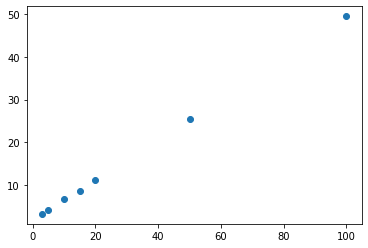

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter([3,5,10,15,20,50,100],timeListNewRaiwalWayLine)
plt.show()